In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scvelo as scv
import scanpy
import smurf

import warnings
warnings.filterwarnings('ignore')

import dynamo as dyn

dyn.get_all_dependencies_version()

package,umap-learn,pynndescent,python-igraph,numdifftools,seaborn,statsmodels,numba,dynamo-release,scikit-learn,cvxopt,scipy,numpy,networkx,pre-commit,colorcet,loompy,openpyxl,matplotlib,get-version,tqdm,setuptools,pandas
version,0.5.3,0.5.7,0.9.11,0.9.40,0.11.2,0.13.2,0.55.2,1.1.0,1.1.1,1.3.0,1.8.1,1.22.4,2.8.4,2.19.0,3.0.0,3.0.7,3.0.10,3.5.2,3.5.4,4.64.0,61.2.0,1.3.5


In [89]:
# adata = dyn.read_loom('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus.loom')
adata = dyn.read_h5ad('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
# print(type(adata.obs['clusters']))
print(adata)

# data = pd.read_hdf('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
# print(data)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [90]:
# scanpy.pp.filter_genes(adata, min_cells=1, max_cells=None) 
# print(adata.shape)

# s = adata.to_df(layer='spliced')
# u = adata.to_df(layer='unspliced')
# data = adata.to_df()

# # print(s.shape)
# # print(u.shape)

# u = u.loc[:,(u!=0).any(axis=0)]
# print(u.columns)
# print(u.shape)

# var_name = u.columns

# # print(adata.var)
# adata = adata[:,adata.var.index.isin(var_name)]
# print(adata.shape)

# s = adata.to_df(layer='spliced')
# u = adata.to_df(layer='unspliced')
# print(s.shape)
# print(u.shape)

In [91]:
# # create a SMURF object which only return the imputed data
# operator = smurf.SMURF(n_features=20, estimate_only=True)

# # impute
# s_data_imputed = operator.smurf_impute(s)

# # create a SMURF object
# operator = smurf.SMURF(n_features=20, estimate_only=False)

# # impute
# s_res = operator.smurf_impute(s)

# # get the results
# s_data_imputed = s_res["estimate"]

# gene_matrix = s_res["gene latent factor matrix"]

# cell_matrix = s_res["cell latent factor matrix"]

In [92]:
# # u.fillna(0,inplace=True)

# # create a SMURF object which only return the imputed data
# operator = smurf.SMURF(n_features=20, estimate_only=True)

# # impute
# u_data_imputed = operator.smurf_impute(u)

# # create a SMURF object
# operator = smurf.SMURF(n_features=20, estimate_only=False)

# # impute
# u_res = operator.smurf_impute(u)

# # get the results
# u_data_imputed = u_res["estimate"]

# gene_matrix = u_res["gene latent factor matrix"]

# cell_matrix = u_res["cell latent factor matrix"]

In [93]:
print(adata)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [94]:
# import scipy
# # spliced = scanpy.AnnData(s)
# spliced = scipy.sparse.csr_matrix(s_data_imputed.values)
# unspliced = scipy.sparse.csr_matrix(u_data_imputed.values)

# adata.layers['spliced'] = spliced
# adata.layers['unspliced'] = unspliced


In [95]:
dyn.pp.recipe_monocle(adata)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

In [96]:
# print(adata.layers['X_spliced'].shape)

In [97]:
dyn.tl.dynamics(adata,model='stochastic')

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [10.5596s]


estimating gamma: 100%|██████████| 2000/2000 [01:21<00:00, 24.66it/s]


AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

In [100]:
#imputation for velocity_S / almost no change
# data = adata.to_df(layer='velocity_S')
# data.fillna(0,inplace=True)
# data = data.loc[:,(data!=0).any(axis=0)]

#imputation for data.X

scanpy.pp.filter_genes(adata, min_cells=1, max_cells=None) 
data = adata.to_df(layer='velocity_S')
data.fillna(0,inplace=True)
data = data.loc[:,(data!=0).any(axis=0)]


# data = adata.X

# data = pd.DataFrame.sparse.from_spmatrix(data)
# print(data)

In [101]:
# create a SMURF object which only return the imputed data
operator = smurf.SMURF(n_features=20, estimate_only=True)

# impute
s_data_imputed = operator.smurf_impute(data)

# create a SMURF object
operator = smurf.SMURF(n_features=20, estimate_only=False)

# impute
s_res = operator.smurf_impute(data)

# get the results
s_data_imputed = s_res["estimate"]

gene_matrix = s_res["gene latent factor matrix"]

cell_matrix = s_res["cell latent factor matrix"]

Running SCEnd on 2000 cells and 2930 genes
normalizing data by library size...
preprocessing data...
number of iteration:  1 / 10
number of iteration:  2 / 10
number of iteration:  3 / 10
number of iteration:  4 / 10
number of iteration:  5 / 10
number of iteration:  6 / 10
number of iteration:  7 / 10
number of iteration:  8 / 10
number of iteration:  9 / 10
number of iteration:  10 / 10
Running SCEnd on 2000 cells and 2930 genes
normalizing data by library size...
preprocessing data...
number of iteration:  1 / 10
number of iteration:  2 / 10
number of iteration:  3 / 10
number of iteration:  4 / 10
number of iteration:  5 / 10
number of iteration:  6 / 10
number of iteration:  7 / 10
number of iteration:  8 / 10
number of iteration:  9 / 10
number of iteration:  10 / 10


In [109]:
import scipy
velocity = scipy.sparse.csr_matrix(s_data_imputed)

# u = u.loc[:,(u!=0).any(axis=0)]
# print(u.columns)
# print(u.shape)

var_name = data.columns

# print(adata.var)
adata = adata[:,adata.var.index.isin(var_name)]

adata.layers['velocity_S'] = velocity

In [110]:
dyn.tl.reduceDimension(adata)

|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.3257s]


In [111]:
# dyn.tl.cell_velocities(adata)
dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'}, enforce=True, basis='umap')

|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [7.4713s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.8952s]


AnnData object with n_obs × n_vars = 2930 × 2000
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'n_cells', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspli

In [112]:
# dyn.vf.VectorField(adata,basis = 'umap')
dyn.tl.cell_wise_confidence(adata)

AnnData object with n_obs × n_vars = 2930 × 2000
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'n_cells', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'uns

|-----------> plotting with basis key=X_umap
|-----------> skip filtering clusters by stack threshold when stacking color because it is not a numeric type


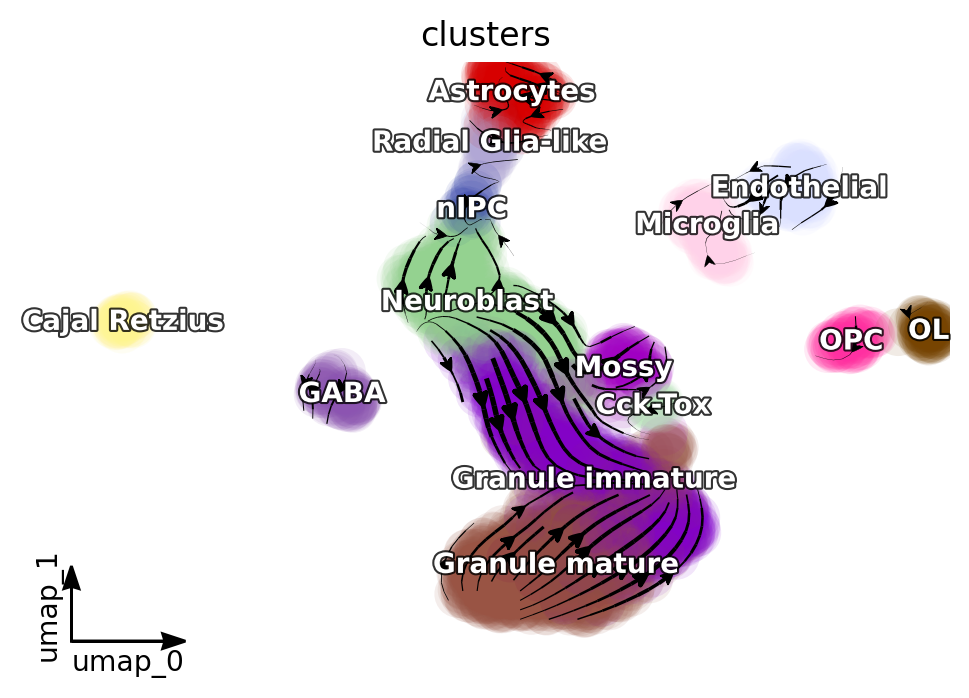

In [113]:
# fig1, f1_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12, 4))
# f1_axes[0] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[0], show_legend='right', save_show_or_return='return')
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', show_arrowed_spines=True)
# f1_axes[0].set_title('splicing')
# f1_axes[1] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[1], show_legend='right', save_show_or_return='return')
# f1_axes[1].set_title('labeling')
plt.show()

In [114]:
adata

AnnData object with n_obs × n_vars = 2930 × 2000
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'n_cells', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'uns

In [115]:
print(adata.obs['jaccard_velocity_confidence'])

index
AAACATACCCATGA    0.131687
AAACATACCGTAGT    0.345029
AAACATACGAGAGC    0.083612
AAACATACTGAGGG    0.140351
AAACATTGGCATCA    0.190687
                    ...   
TTTCTACTTCCCGT    0.179601
TTTGACTGCCTGTC    0.288210
TTTGACTGTCTGGA    0.097561
TTTGCATGGGAGTG    0.418919
TTTGCATGTTCTTG    0.151515
Name: jaccard_velocity_confidence, Length: 2930, dtype: float64


In [116]:
# adata.obsm[[key for key in adata.obsm if key.startswith('velocity_S')][0]]
# v_emb = adata.obsm['{}_umap'.format('velocity_S')]

In [117]:
import eval_util
from imp import reload
reload(eval_util)

cluster_edges = [("OPC", "OL")]
eval_util.evaluate(adata, cluster_edges, 'clusters', "velocity_S", x_emb="X_umap")

# Cross-Boundary Transition Score (A->B)
{('OPC', 'OL'): -0.006027310513476261}
Total Mean: -0.006027310513476261
# Cross-Boundary Velocity Coherence (A->B)
{('OPC', 'OL'): 0.9894885456086617}
Total Mean: 0.9894885456086617
# Cross-Boundary Direction Correctness (A->B)
{('OPC', 'OL'): 0.03756642210330347}
Total Mean: 0.03756642210330347
# In-cluster Coherence
{'Astrocytes': 0.6863581286520369, 'Cajal Retzius': 0.9973065000643184, 'Cck-Tox': 0.927521546968777, 'Endothelial': 0.8393074208170209, 'GABA': 0.8062667447320354, 'Granule immature': 0.6262850100914026, 'Granule mature': 0.5542279284933045, 'Microglia': 0.7859431563797237, 'Mossy': 0.7232273928614696, 'Neuroblast': 0.6814429853830334, 'OL': 0.996262261941758, 'OPC': 0.9984267854451084, 'Radial Glia-like': 0.9800200299651161, 'nIPC': 0.654239569836219}
Total Mean: 0.8040596758308088
# In-cluster Confidence
{'Astrocytes': 0.355102787323886, 'Cajal Retzius': 0.9146193812860479, 'Cck-Tox': 0.15213544364742979, 'Endothelial': 0.49930

{'Cross-Boundary Transition Score (A->B)': {('OPC',
   'OL'): [-0.011299838069169687, -0.0006279296078193561, -0.0018516246568889565, -0.0030667268951445857, -0.011956531868564544, -0.010390357102232402, -0.002998165394514288]},
 'Cross-Boundary Velocity Coherence (A->B)': {('OPC',
   'OL'): [0.9851355389636256, 0.9920627127684978, 0.9933623209681748, 0.9892064084978909, 0.9884842453463288, 0.9902220914542618, 0.9879465012618518]},
 'Cross-Boundary Direction Correctness (A->B)': {('OPC',
   'OL'): [-0.39958815980884577, 0.07731030745591244, 0.9549917091582358, 0.8796181572397304, -0.09527551616397578, -0.2335631820826306, -0.9205283610753021]},
 'In-cluster Coherence': {'Astrocytes': [0.5293227611599808,
   0.832868358976252,
   0.6543365292866395,
   0.8472461454413212,
   0.5331439963083461,
   0.7322988758280649,
   0.7279648348095725,
   0.6475877266052057,
   0.6878369190000548,
   0.9139783970242957,
   0.18903220932882897,
   0.6331892760425653,
   0.5673575352583878,
   0.69987

In [118]:
# Abundance of ['spliced', 'unspliced']: [0.9 0.1]
# Cross-Boundary Transition Score (A->B) {('OPC', 'OL'): 0.00630295} 
# Total Mean: 0.006302949972450733
# # Cross-Boundary Velocity Coherence (A->B) {('OPC', 'OL'): 0.3934500415874338}
#  Total Mean: 0.3934500415874338 
# Cross-Boundary Direction Correctness (A->B) {('OPC', 'OL'): -0.4227274062633888} 
# Total Mean: -0.4227274062633888 
# In-cluster Coherence {'Astrocytes': 0.7609318681810356, 'Cajal Retzius': 0.9378692715572066, 'Cck-Tox': 0.828734583852736, 'Endothelial': 0.9314706331659218, 'GABA': 0.882795543614253, 'Granule immature': 0.7868408703982197, 'Granule mature': 0.7489468911509204, 'Microglia': 0.7524512450389534, 'Mossy': 0.8492471138928402, 'Neuroblast': 0.7524816364622642, 'OL': 0.9347272229079507, 'OPC': 0.9451652802702815, 'Radial Glia-like': 0.9283747568913194, 'nIPC': 0.9197938162835281} 
# Total Mean: 0.8542736238333878 
# # In-cluster Confidence {'Astrocytes': 0.7537898279256907, 'Cajal Retzius': 0.9332962276885705, 'Cck-Tox': 0.7505103008792292, 'Endothelial': 0.9221172614286053, 'GABA': 0.8864795512978749, 'Granule immature': 0.7682340803641703, 'Granule mature': 0.7337182506902056, 'Microglia': 0.7429558783303785, 'Mossy': 0.8291995007567275, 'Neuroblast': 0.7423294623889758, 'OL': 0.9311022403250092, 'OPC': 0.9390802734135254, 'Radial Glia-like': 0.8904570023880877, 'nIPC': 0.8826370031044427} 
# Total Mean: 0.8361362043558208
print('')
